# Learning Keras

In [132]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers

# Configure network architecture

In [59]:
# lets add inputs

# model architecture
inputs = keras.Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
x  = Dropout(rate=0.1)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# create model and setting optimizer and loss
model = keras.Model(inputs=inputs, outputs=outputs, )
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(), 
             metrics=["accuracy"])

In [60]:
# lets load mnist dataset

In [61]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [62]:
# convert dataset to normal shape
x_train = x_train.reshape((60000, 784)).astype('float')/255
x_test = x_test.reshape((10000, 784)).astype('float')/255


# Learning step

In [74]:
# fitting the model

history = model.fit(x=x_train, y=y_train, batch_size=500, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0528 - accuracy: 0.9826 - val_loss: 0.0802 - val_accuracy: 0.9787
Epoch 2/20
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0768 - val_accuracy: 0.9787
Epoch 3/20
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0824 - val_accuracy: 0.9780
Epoch 4/20
54000/54000 [==============================] - 1s 17us/sample - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0801 - val_accuracy: 0.9790
Epoch 5/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0779 - val_accuracy: 0.9785
Epoch 6/20
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.0787 - val_accuracy: 0.9777
Epoch 7/20
54000/54000 [==============================] -

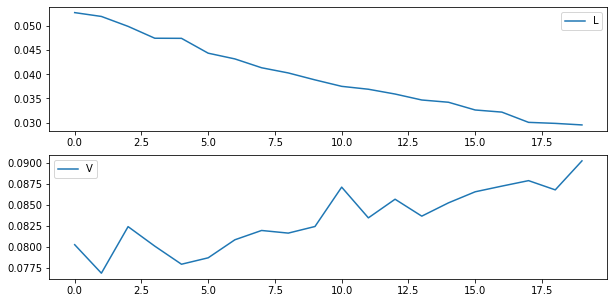

In [75]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, figsize=(10,5))
axes[0].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])

axes[0].legend("L")
axes[1].legend("V")
plt.show()

# Model evaluation

In [129]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_true=y_test, y_pred=model.predict(x_test).argmax(axis=1)))
print("ACCURACY_SCORE: "+str(accuracy_score(y_true=y_test, y_pred=model.predict(x_test).argmax(axis=1))))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

ACCURACY_SCORE: 0.9767


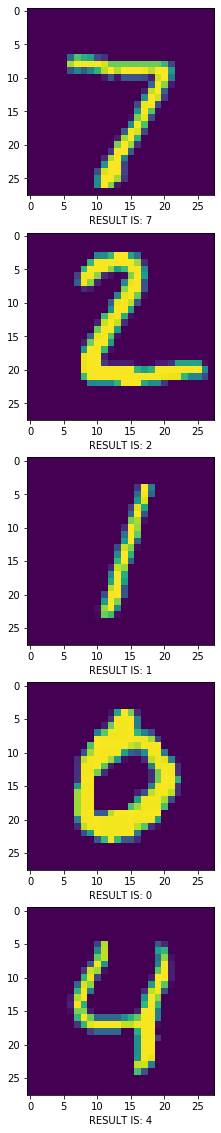

In [130]:
import matplotlib

N = 5
fig, axes = plt.subplots(N, figsize=(20,20), )
for i in range(N):
    axes[i].imshow(x_test[i].reshape((28,28)), )
    axes[i].set_xlabel("RESULT IS: "+str(model.predict((x_test[i]).reshape(1,784)).argmax()))

plt.show()
